In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Load the train data set
test_df = pd.read_csv('test.csv')
# Load train data set
train_df = pd.read_csv('train.csv') 
print(test_df.shape, train_df.shape)
print(test_df.shape[0]+train_df.shape[0])
print(train_df.shape[0]/(test_df.shape[0]+train_df.shape[0]))
print(test_df.shape[0]/(test_df.shape[0]+train_df.shape[0]))

(33755, 5) (78761, 5)
112516
0.6999982224750257
0.3000017775249742


In [23]:
# Loading the whole data set
final_df = pd.read_csv('Improved_All_Combined_hr_rsp_binary.csv')
# Dropping the rows with missing values
final_df.dropna(inplace=True)
# Seperating the features and labels
final_X = final_df[['Participant',"HR", "respr","Time(sec)"]]
final_y = final_df["Label"]
# Splitting the data set into train, validation and test set
X_train, X_temp, y_train, y_temp = train_test_split(final_X, final_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


             Participant        HR     respr  Time(sec)     Label
Participant     1.000000 -0.068490 -0.102940   0.979107  0.007041
HR             -0.068490  1.000000 -0.336027  -0.081070  0.139127
respr          -0.102940 -0.336027  1.000000  -0.090437 -0.048149
Time(sec)       0.979107 -0.081070 -0.090437   1.000000  0.007865
Label           0.007041  0.139127 -0.048149   0.007865  1.000000


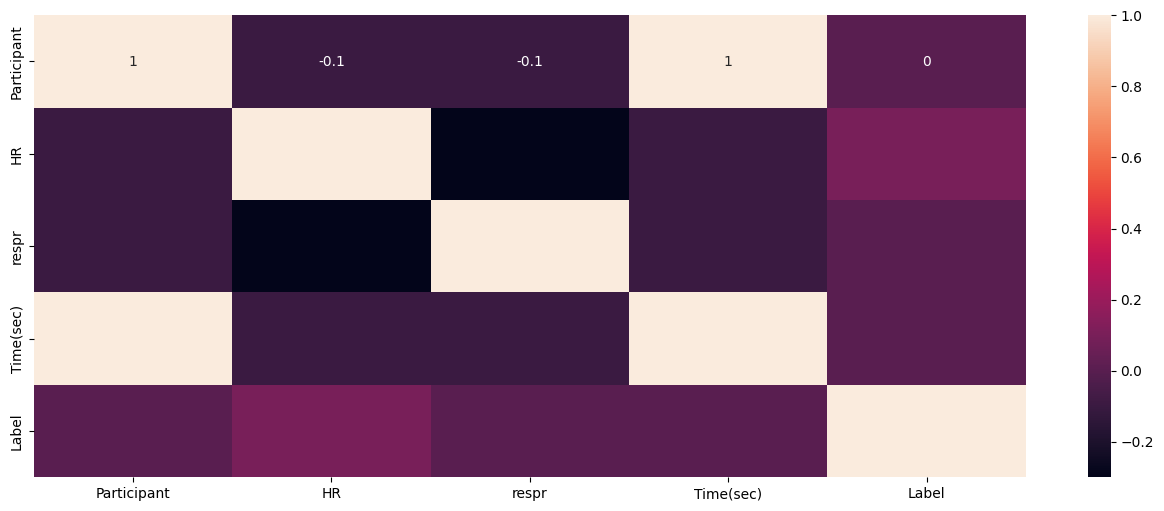

In [24]:
# Trying to find the correlation between the features
print(final_df.corr())
plt.figure(figsize=(16, 6))
sns.heatmap (final_df.corr().round(1), annot=True);

In [25]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     11334
           1       0.00      0.00      0.00      5537

    accuracy                           0.67     16871
   macro avg       0.34      0.50      0.40     16871
weighted avg       0.45      0.67      0.54     16871



c:\Users\Tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [26]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11334
           1       0.99      0.99      0.99      5537

    accuracy                           0.99     16871
   macro avg       0.99      0.99      0.99     16871
weighted avg       0.99      0.99      0.99     16871



### Assignment 2

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score

Fitting 2 folds for each of 162 candidates, totalling 324 fits
{'bootstrap': True, 'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81     11334
           1       0.91      0.07      0.12      5537

    accuracy                           0.69     16871
   macro avg       0.80      0.53      0.47     16871
weighted avg       0.76      0.69      0.59     16871



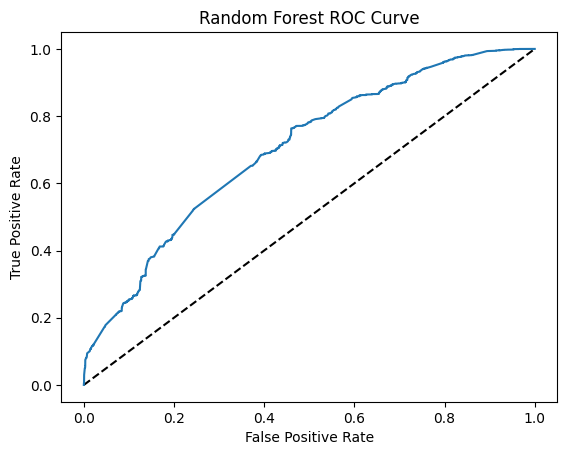

AUC: 0.7018430706256089


In [33]:
# Using the grid search to find the best parameters for the random forest classifier
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")

# Find the confusion matrix
confusion_matrix(y_test, y_pred)
# find ROC curve for all the models for each
y_pred_prob = best_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show();
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
 

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 0.001, 'penalty': 'none'}
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     11334
           1       0.00      0.00      0.00      5537

    accuracy                           0.67     16871
   macro avg       0.34      0.50      0.40     16871
weighted avg       0.45      0.67      0.54     16871



c:\Users\Tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being

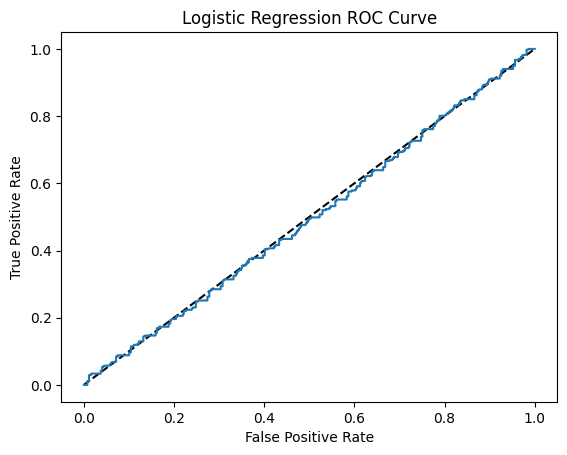

AUC: 0.4947230765048539


In [29]:
# Using the grid search to find the best parameters for the logistic regression classifier
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")

# Find the confusion matrix
confusion_matrix(y_test, y_pred)
# find ROC curve for all the models for each
y_pred_prob = best_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))


In [32]:
# Using a K-fold (k=10) cross validation to find the perfomance of the testing data set
from sklearn.model_selection import cross_val_score
from scipy import stats

rf = RandomForestClassifier()
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=10)
print(cv_scores_rf)
print(f"Average 10-Fold CV Score: {cv_scores_rf.mean():.2f}")


# Using a K-fold (k=10) cross validation to find the perfomance of the testing data set
logreg = LogisticRegression()
cv_scores_regression = cross_val_score(logreg, X_train, y_train, cv=10)
print(cv_scores_regression)
print(f"Average 10-Fold CV Score: {cv_scores_regression.mean():.2f}")

# Calculate the differences
differences = [lr - rf for lr, rf in zip(cv_scores_regression, cv_scores_rf)]

# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(cv_scores_regression, cv_scores_rf)

# Report the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("There is no statistically significant difference in performance.")

# print accuracy, confusion matrix, ROC Curve, and Area Under ROC (AUROC)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
# y_pred = rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Classification Report:\n{report}")
# confusion_matrix(y_test, y_pred)
# y_pred_prob = rf.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plt.plot([0,1],[0,1],'k--')
# plt.plot(fpr,tpr, label='Random Forest')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Random Forest ROC Curve')
# plt.show();
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

[0.98996571 0.98971167 0.98882256 0.99009272 0.98818748 0.98717135
 0.98818748 0.98704433 0.98996571 0.98894957]
Average 10-Fold CV Score: 0.99
[0.67267878 0.67267878 0.67267878 0.67267878 0.67267878 0.67267878
 0.67267878 0.67267878 0.67267878 0.67255176]
Average 10-Fold CV Score: 0.67
t-statistic: -873.9462461135101
p-value: 1.7119355272901644e-23
The difference in performance is statistically significant.


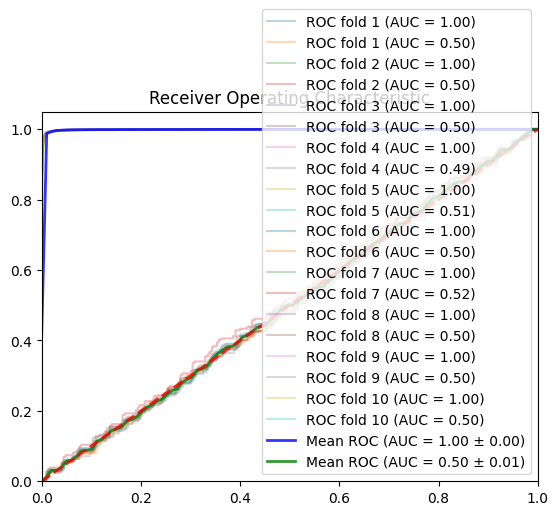

Mean AUROC: 1.00 (±0.00)
Mean AUROC: 0.50 (±0.01)
Mean Confusion Matrix:
 [[5261.1   34.8]
 [  47.1 2530. ]]
Mean Confusion Matrix:
 [[5295.9    0. ]
 [2577.1    0. ]]


In [41]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are already defined
X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size=0.3, random_state=42)
# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(random_state=42)
# Lists to store metrics
auroc_scores = []
lr_auroc_scores = []
conf_matrices = []
lr_conf_matrices = []
tprs = []
lr_tprs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

# Execute Stratified K-Fold cross-validation on the training data
for i, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    # Split the training data into a training set and a validation set
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the model
    rf.fit(X_train_fold, y_train_fold)
    lr.fit(X_train_fold, y_train_fold)
    # Get probability scores of the positive class
    y_val_prob = rf.predict_proba(X_val_fold)[:, 1]
    y_val_prob_lr = lr.predict_proba(X_val_fold)[:, 1]

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_val_fold, y_val_prob)
    dfpr, dtpr, dthresholds = roc_curve(y_val_fold, y_val_prob_lr)
    roc_auc = auc(fpr, tpr)
    lr_auc = auc(dfpr, dtpr)
    
    auroc_scores.append(roc_auc)
    lr_auroc_scores.append(lr_auc)
    
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    lr_tprs.append(np.interp(mean_fpr, dfpr, dtpr))
    
    # Compute confusion matrix
    y_val_pred = rf.predict(X_val_fold)
    lr_y_val_pred = lr.predict(X_val_fold)
    conf_matrices.append(confusion_matrix(y_val_fold, y_val_pred))
    lr_conf_matrices.append(confusion_matrix(y_val_fold, lr_y_val_pred))
    
    # Plot ROC for the current fold
    ax.plot(fpr, tpr, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')
    ax.plot(dfpr, dtpr, alpha=0.3, label=f'ROC fold {i+1} (AUC = {lr_auc:.2f})')

# Plot the mean ROC
mean_tpr = np.mean(tprs, axis=0)
lr_mean_tpr = np.mean(lr_tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
lr_mean_auc = auc(mean_fpr, lr_mean_tpr)
std_auc = np.std(auroc_scores)
lr_std_auc = np.std(lr_auroc_scores)

ax.plot(mean_fpr, mean_tpr, color='b',label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',lw=2, alpha=.8)
ax.plot(mean_fpr, lr_mean_tpr, color='g',label=f'Mean ROC (AUC = {lr_mean_auc:.2f} ± {lr_std_auc:.2f})',lw=2, alpha=.8)

# Plot the chance line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.05], title="Receiver Operating Characteristic")
ax.legend(loc="lower right")
plt.show()

# Calculate and print the mean AUROC score across all folds
mean_auroc = np.mean(auroc_scores)
lr_mean_auroc = np.mean(lr_auroc_scores)
std_auroc = np.std(auroc_scores)
lr_std_auroc = np.std(lr_auroc_scores)
print(f'Mean AUROC: {mean_auroc:.2f} (±{std_auroc:.2f})')
print(f'Mean AUROC: {lr_mean_auroc:.2f} (±{lr_std_auroc:.2f})')

# Calculate and print the mean confusion matrix
mean_conf_matrix = np.mean(conf_matrices, axis=0)
lr_mean_conf_matrix = np.mean(lr_conf_matrices, axis=0)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Mean Confusion Matrix:\n', lr_mean_conf_matrix)
